In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Auxiliary Functions

In [2]:
def show_business_rating_dist(df):
    # Count stars
    stars = []
    for i in range(9):
        stars.append(df[df['stars'] == (i + 2) * 0.5])
    star_counts = [len(df.index) for df in stars]
    print(star_counts)

    # Generate pie chart
    plt.figure(figsize=(6,9))
    labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']
    colors = ['orange','yellowgreen','lightskyblue','yellow', 'red', 'purple', 'blue', 'green', 'pink']
    explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(
        star_counts,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct = '%3.2f%%',
        shadow = False,
        startangle =90,
        pctdistance = 0.6
    )
    plt.axis('equal')
    plt.show()

In [3]:
def show_review_rating_dist(df):
    # Count stars
    stars = []
    for i in range(5):
        stars.append(df[df['stars'] == i + 1])
    star_counts = [len(df.index) for df in stars]
    print(star_counts)

    # Generate pie chart
    plt.figure(figsize=(6,9))
    labels = ['1', '2', '3', '4', '5']
    colors = ['orange','yellowgreen','lightskyblue','yellow', 'red']
    explode = (0, 0, 0, 0, 0)
    plt.pie(
        star_counts,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct = '%3.2f%%',
        shadow = False,
        startangle =90,
        pctdistance = 0.6
    )
    plt.axis('equal')
    plt.show()

# Read CSVs

In [4]:
# Read the two CSV files to pandas dataframes

df_business = pd.read_csv('business.csv')
df_review = pd.read_csv('review.csv')

In [5]:
# Delete unneeded keys in df_business

preserved_keys_business = ['business_id', 'name', 'categories', 'stars']
for key in df_business.keys():
    if key not in preserved_keys_business:
        del df_business[key]
print(df_business.keys())

Index(['stars', 'business_id', 'name', 'categories'], dtype='object')


In [6]:
# Delete unneeded keys in df_review

preserved_keys_review = ['text', 'business_id', 'stars']
for key in df_review.keys():
    if key not in preserved_keys_review:
        del df_review[key]
print(df_review.keys())

Index(['text', 'stars', 'business_id'], dtype='object')


# Statistics on Distribution of Rating Stars

174567
[3788, 4303, 9320, 16148, 23142, 32038, 33492, 24796, 27540]


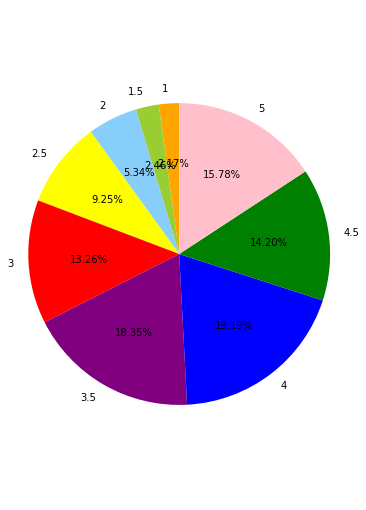

In [7]:
# Rating star distribution of df_business
print(len(df_business.index))
show_business_rating_dist(df_business)

5261669
[731363, 438161, 615481, 1223316, 2253348]


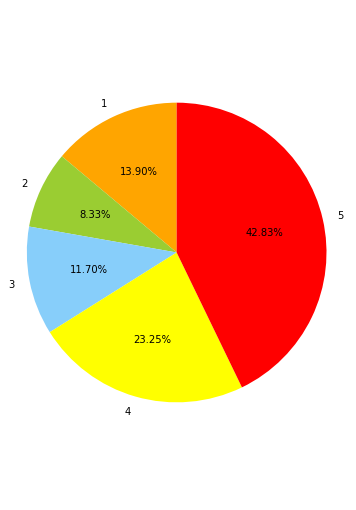

In [8]:
# Rating star distribution of df_review

print(len(df_review.index))
show_review_rating_dist(df_review)

# Statistics on the Distribution of Rating Stars on Preprocessed Data

In [9]:
# Filter 'Restaurants' businesses

df_restaurants = pd.read_csv('restaurant_review.csv', delimiter='\t')

342285
[27288, 0, 17633, 0, 29309, 0, 85165, 0, 182886]


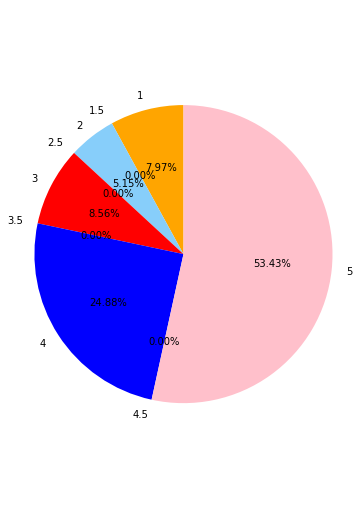

In [10]:
# Rating star distribution of df_restaurants

print(len(df_restaurants.index))
show_business_rating_dist(df_restaurants)

342285
[27288, 17633, 29309, 85165, 182886]


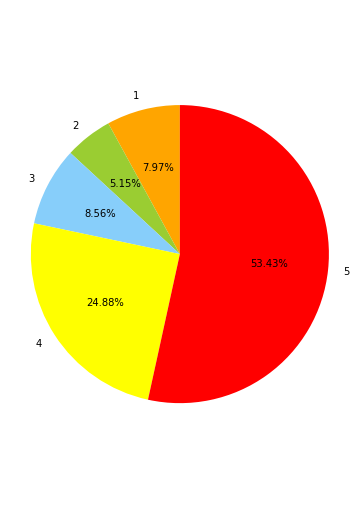

In [11]:
# Rating star distribution of df_review

print(len(df_restaurants.index))
show_review_rating_dist(df_restaurants)

# Vocabulary

In [12]:
from collections import OrderedDict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
class Lang:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS"}
        self.n_words = 1  # Count START
        
    def addSentence(self, sent):
        for word in sent.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [14]:
# Train.csv
df_restaurants.dropna(inplace=True)
lang = Lang()
df = pd.read_csv("train.csv", delimiter='\t')
df = df_restaurants.head(200000)
for sent in df['text']:
    lang.addSentence(sent)
print(lang.n_words)
l = []
for i in lang.word2count.values():
    l.append(i)
l.sort(reverse=True)

68064


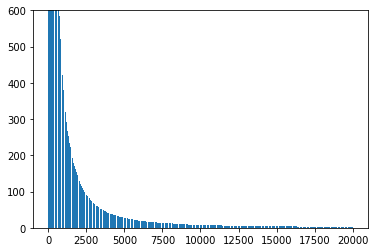

In [15]:
plt.ylim(ymax=600)
plt.bar(range(20000), l[:20000])
plt.show()

In [16]:
print(l[10493])

7


In [17]:
# Val.csv

lang = Lang()
df = pd.read_csv("val.csv", delimiter='\t')
for sent in df['text']:
    lang.addSentence(sent)
print(lang.n_words)
l = []
for i in lang.word2count.values():
    l.append(i)
l.sort(reverse=True)

11935


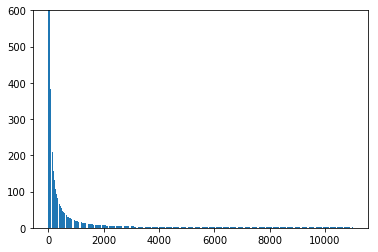

In [18]:
plt.ylim(ymax=600)
plt.bar(range(11000), l[:11000])
plt.show()

In [19]:
print(l[0])

17280
